## Spatial wavefield gradient-based seismic wavefield separation

### 02 P/S separation of synthetic land data

Robertsson & Curtis (2002) derived expressions to estimate the upgoing P- and S-wave potentials using spatially compact receiver groups. We work with particle velocities instead of wavefield potentials to obtain the horizontal component of the upgoing S-wave constituents and the vertical component of the upgoing P-wave constituents (see Van Renterghem et al. (2018) for details):

$$
v_x^{S^U} \approx \frac{\beta}{i\omega}(\nabla \times v^U)_y \approx \frac{1}{2}(v_x - \frac{1}{i\omega} 2\beta \frac{\partial v_z}{\partial x})
$$

$$
v_y^{S^U} \approx \frac{\beta}{i\omega}(\nabla \times v^U)_x \approx \frac{1}{2}(v_y - \frac{1}{i\omega} 2\beta \frac{\partial v_z}{\partial y})
$$

$$
v_z^{P^U} \approx \frac{\alpha}{i\omega}(\nabla \cdot v^U) \approx \frac{1}{2}(v_z + \frac{1}{i\omega} \frac{2\beta^2}{\alpha} (\frac{\partial v_x}{\partial x}+\frac{\partial v_y}{\partial y}))
$$

The above equations separate the recorded particle velocity components into their P- and S-wave constituents and additionally remove the free-surface effect.

We test our P/S separation filters on synthetic data generated on a 2D model. A force source emitting a 50 Hz Ricker wavelet was placed at 100 m depth in a homogeneous medium with P- and S-wave velocities of 1800 and 900 m/s, respectively. The incident P- and S-wave arrivals were recorded at the free-surface.

In [1]:
# import libraries 
# ----------------
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check .mat file 
# ---------------
from scipy.io import whosmat
whosmat('PS_filters_land_synthetic_resample.mat') # to list variables inside mat file

[('vx', (3001, 500), 'double'), ('vz', (3001, 500), 'double')]

In [3]:
# load .mat file 
# --------------
from scipy.io import loadmat
mat = loadmat('PS_filters_land_synthetic_resample.mat')  # to load mat file
# convert them to numpy array
vx = mat['vx']
vz = mat['vz']
mat = 0

In [4]:
# initialize parameter 
# --------------------
nx = vx.shape[1] # number of cells in x direction
dx = 1           # cell size
dt = 1e-4        # time step
alpha = 1800     # P-wave velocity
beta = 900       # S-wave velocity
rho = 1600       # density

In [6]:
# calculate wavefield gradients 
# -----------------------------
from fd_weights import *
c = fd_weights(0, [-3/2, -1/2, 1/2, 3/2], 1) # FD coefficients according to Fornberg (1988)

# allocate zero gradients
gradx_vx = np.zeros((vx.shape[0],nx))
gradx_vz = np.zeros((vx.shape[0],nx))

for n in range(2,(vx.shape[1])-2):
    # horizontal gradients of vx
    gradx_vx[:,n] = ((c[0]*vx[:,n-2]) + (c[1]*vx[:,n-1]) + (c[2]*vx[:,n])   + (c[3]*vx[:,n+1])) / dx
    # horizontal gradients of vz
    gradx_vz[:,n] = ((c[0]*vz[:,n-1]) + (c[1]*vz[:,n])   + (c[2]*vz[:,n+1]) + (c[3]*vz[:,n+2])) / dx
    
# P/S separation 
# --------------
# upgoing P-wave on vz
vz_P_up = (1/2.) *(vz + ((beta*((2*beta)/alpha)) * (gradx_vx.cumsum(axis=0)*dt))) 
# upgoing S-wave on vx
vx_S_up = (1/2.) *(vx - ((2*beta) * (gradx_vz.cumsum(axis=0)*dt))) 

<IPython.core.display.Javascript object>


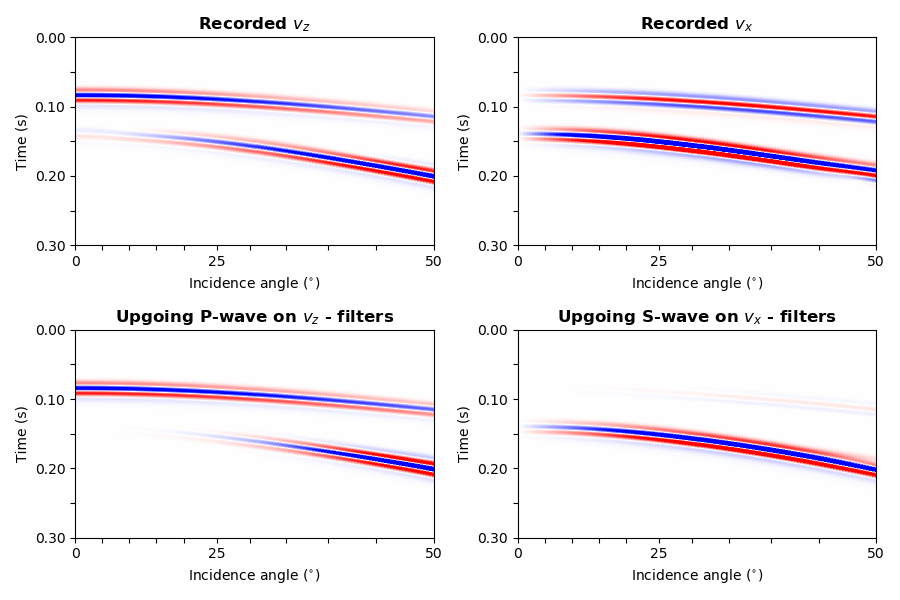

In [7]:
# plotting configuration 
# ----------------------
plt.figure(figsize=(9, 6))

# recorded vz
plt.subplot(2,2,1)
vm1 = np.percentile(vz, 99)
plt.imshow(-vz, cmap="bwr", vmin=-vm1, vmax=vm1, aspect='auto')
plt.xlim(1000/4,1476/4)
plt.ylim(60000/20,0)
plt.title('Recorded $v_z$',fontweight="bold")
plt.xlabel('Incidence angle ($^{\circ}$)')
plt.ylabel('Time (s)')
plt.xticks([1000/4,1036/4,1072/4,1108/4,1144/4,1188/4,1232/4,1280/4,1336/4,1400/4,1476/4],['0','','','','','25','','','','','50'])
plt.yticks([0,10000/20,20000/20,30000/20,40000/20,50000/20,60000/20],['0.00','','0.10','','0.20','','0.30'])

# P/S separated upgoing vz
plt.subplot(2,2,3)
vm2 = np.percentile(vz_P_up, 99)
plt.imshow(-vz_P_up, cmap="bwr", vmin=-vm2, vmax=vm2, aspect='auto')
plt.xlim(1000/4,1476/4)
plt.ylim(60000/20,0)
plt.title('Upgoing P-wave on $v_z$ - filters',fontweight="bold")
plt.xlabel('Incidence angle ($^{\circ}$)');
plt.ylabel('Time (s)')
plt.xticks([1000/4,1036/4,1072/4,1108/4,1144/4,1188/4,1232/4,1280/4,1336/4,1400/4,1476/4],['0','','','','','25','','','','','50'])
plt.yticks([0,10000/20,20000/20,30000/20,40000/20,50000/20,60000/20],['0.00','','0.10','','0.20','','0.30'])

# recorded vx
plt.subplot(2,2,2)
vm3 = np.percentile(vx, 99)
plt.imshow(-vx, cmap="bwr", vmin=-vm3, vmax=vm3, aspect='auto')
plt.xlim(1000/4,1476/4)
plt.ylim(60000/20,0)
plt.title('Recorded $v_x$',fontweight="bold")
plt.xlabel('Incidence angle ($^{\circ}$)')
plt.ylabel('Time (s)')
plt.xticks([1000/4,1036/4,1072/4,1108/4,1144/4,1188/4,1232/4,1280/4,1336/4,1400/4,1476/4],['0','','','','','25','','','','','50'])
plt.yticks([0,10000/20,20000/20,30000/20,40000/20,50000/20,60000/20],['0.00','','0.10','','0.20','','0.30'])

# P/S separated upgoing vx
plt.subplot(2,2,4)
vm4 = np.percentile(vx_S_up, 99)
plt.imshow(-vx_S_up, cmap="bwr", vmin=-vm4, vmax=vm4, aspect='auto')
plt.xlim(1000/4,1476/4)
plt.ylim(60000/20,0)
plt.title('Upgoing S-wave on $v_x$ - filters',fontweight="bold")
plt.xlabel('Incidence angle ($^{\circ}$)')
plt.ylabel('Time (s)')
plt.xticks([1000/4,1036/4,1072/4,1108/4,1144/4,1188/4,1232/4,1280/4,1336/4,1400/4,1476/4],['0','','','','','25','','','','','50'])
plt.yticks([0,10000/20,20000/20,30000/20,40000/20,50000/20,60000/20],['0.00','','0.10','','0.20','','0.30'])

# show result on screen
plt.tight_layout()
plt.show()

The figures shows the total horizontal and vertical particle velocity recordings and the P/S separated results using our equations above. The horizontal component P-wave is effectively suppressed, whereas the vertical component S-wave is only suppressed up to the critical angle.